# Camera công nghiệp, ống kính và tính toán FOV


## Mục lục
1. [Giới thiệu](#gioi-thieu)
2. [Camera công nghiệp và đặc điểm](#camera-cong-nghiep-va-dac-diem)
   1. [Camera Hikvision](#camera-hikvision)
   2. [Ống kính công nghiệp](#ong-kinh-cong-nghiep)
   3. [Cách đọc thông số camera](#cach-doc-thong-so-camera)
3. [Công thức tính FOV của camera](#cong-thuc-tinh-fov-cua-camera)
   1. [Lý thuyết](#ly-thuyet)
   2. [Ví dụ trực quan](#vi-du-truc-quan)
4. [Undistort ảnh với OpenCV sử dụng mẫu bàn cờ](#undistort-anh-voi-opencv-su-dung-mau-ban-co)
   1. [Thu thập ảnh calibration](#thu-thap-anh-calibration)
   2. [Undistort ảnh](#undistort-anh)
   3. [Thông tin về các hệ số biến dạng](#thong-tin-ve-he-so-bien-dang)


## 1. Giới thiệu <a id="gioi-thieu"></a>
Trong bài notebook này, chúng ta sẽ tìm hiểu về:
- **Camera công nghiệp và ống kính công nghiệp**
- **Đặc điểm nổi bật của camera Hikvision**
- **Công thức tính FOV (Field of View) của camera**
- **Cách hiệu chỉnh ảnh bị biến dạng (undistort) với OpenCV sử dụng mẫu bàn cờ (chessboard)**

Chúng ta sẽ thực hiện các ví dụ cụ thể để làm rõ các khái niệm và kỹ thuật trên.


## 2. Camera công nghiệp và đặc điểm <a id="camera-cong-nghiep-va-dac-diem"></a>

   Camera công nghiệp là một thiết bị quan trọng trong các hệ thống tự động hóa hiện đại. Khác với camera thông thường, camera công nghiệp được thiết kế để hoạt động ổn định trong môi trường khắc nghiệt và cung cấp hình ảnh chất lượng cao cho các ứng dụng đo lường chính xác.


### 2.1. Camera Hikvision <a id="camera-hikvision"></a>

 Camera Hikvision là một trong những thương hiệu camera công nghiệp hàng đầu thế giới, được sử dụng rộng rãi trong 
nhiều ứng dụng công nghiệp và an ninh.

### Đặc điểm nổi bật của camera Hikvision:
- **Độ phân giải cao**: Từ 2MP đến 32MP
- **Tốc độ khung hình cao**: Lên đến 120fps ở một số model
- **Kết nối đa dạng**: GigE, USB3.0, Camera Link, CoaXPress
- **Dải nhiệt độ làm việc rộng**: -30°C đến 60°C


In [7]:
import matplotlib.pyplot as plt
from PIL import Image

def show_image(image_path, title="Image", figsize=(10, 6)):
    try:
        img = Image.open(image_path)

        plt.figure(figsize=figsize)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Không thể tải hình ảnh. Lỗi: {e}")


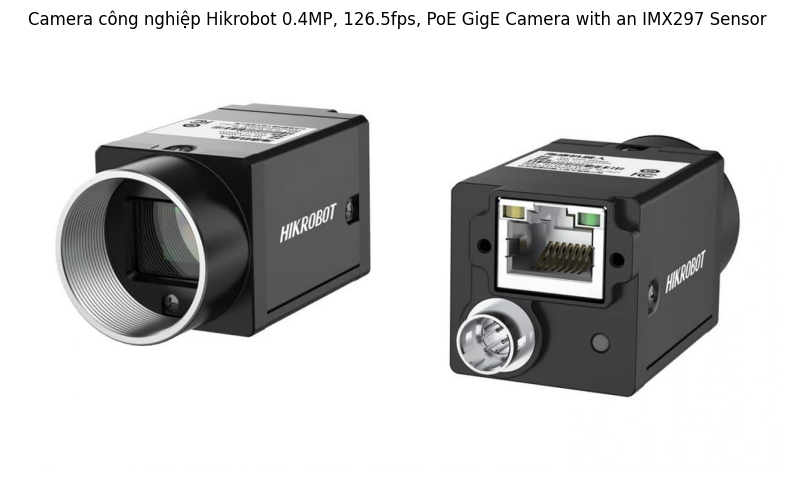

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
import requests


# Hiển thị ảnh minh họa camera Hikvision công nghiệp
try:
    image_path = "image/hikrobot-cam.jpg"
    show_image(image_path, "Camera công nghiệp Hikrobot 0.4MP, 126.5fps, PoE GigE Camera with an IMX297 Sensor")

except:
    print("Không thể tải hình ảnh minh họa. Vui lòng kiểm tra kết nối internet.")



### 2.2. Ống kính công nghiệp <a id="ong-kinh-cong-nghiep"></a>

Hình ảnh chất lượng phụ thuộc vào ống kính


### Ống kính công nghiệp có các đặc điểm quan trọng:
- **Tiêu cự (Focal Length)**: Xác định góc nhìn (FOV) của camera
- **Khẩu độ (Aperture/F-stop)**: Kiểm soát lượng ánh sáng đi vào cảm biến
- **Độ phân giải (Resolution)**: Khả năng tái tạo chi tiết
- **Mount type**: C-mount, CS-mount, F-mount, M12-mount...
- **Độ biến dạng (Distortion)**: Mức độ biến dạng hình ảnh
- **Khoảng cách làm việc (Working Distance)**: Khoảng cách từ ống kính đến vật thể



### Loại ống kính thông dụng:
1. **Ống kính cố định (Fixed Focal Length)**
2. **Ống kính zoom (Zoom Lens)**
3. **Ống kính macro (Macro Lens)**
4. **Ống kính telecentric (Telecentric Lens)**
5. **Ống kính fisheye (Fisheye Lens)**

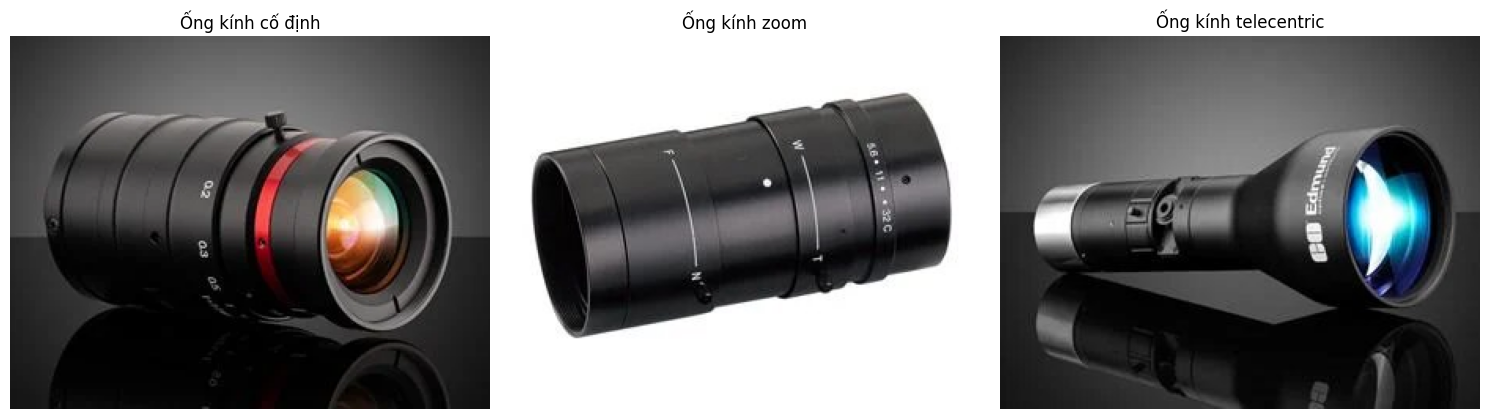

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def show_images(ax, image_path, title="Image"):
    try:
    
        img = Image.open(image_path)
        
        ax.imshow(np.array(img))
        ax.set_title(title)
        ax.axis('off') 
    except Exception as e:
        ax.set_title("Error loading image")
        ax.axis('off')
        print(f"Error: {e}")


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

folder_path = "image"  

image_files = ["hikrobot-cam1.jpg", "hikrobot-cam2.jpg", "hikrobot-cam3.jpg"]  # Replace with actual filenames

image_path0 = os.path.join(folder_path, image_files[0])
image_path1 = os.path.join(folder_path, image_files[1])
image_path2 = os.path.join(folder_path, image_files[2])

show_images(axes[0], image_path0, "Ống kính cố định")
show_images(axes[1], image_path1, "Ống kính zoom")
show_images(axes[2], image_path2, "Ống kính telecentric")

plt.tight_layout()
plt.show()


### Ống kính cố định (Fixed Focal Length):
- Đặc điểm: Tiêu cự không thay đổi, thiết kế đơn giản, ít biến dạng
- Ưu điểm: Giá thành thấp, chất lượng hình ảnh cao, độ tin cậy cao
- Ứng dụng: Các ứng dụng với khoảng cách làm việc cố định như kiểm tra PCB, đọc mã vạch
- Ví dụ thực tế: Trong dây chuyền sản xuất điện thoại, ống kính 16mm được sử dụng để kiểm tra lỗi hàn trên bảng mạch, cho phép phát hiện lỗi nhỏ đến 25 micromet


### Ống kính zoom (Zoom Lens):
- Đặc điểm: Tiêu cự có thể thay đổi trong một dải nhất định
- Ưu điểm: Linh hoạt, có thể điều chỉnh FOV mà không cần thay đổi vị trí camera
- Nhược điểm: Đắt hơn, có thể bị biến dạng nhiều hơn ở các mức zoom cực đại
- Ứng dụng: Các hệ thống cần quan sát nhiều kích thước sản phẩm khác nhau
- Ví dụ thực tế: Trong ngành dệt may, ống kính zoom 6-60mm được sử dụng để kiểm tra vải từ chi tiết nhỏ đến tổng thể


### Ống kính telecentric (Telecentric Lens):
- Đặc điểm: Các tia sáng song song với trục quang học, loại bỏ hiệu ứng phối cảnh
- Ưu điểm: Kích thước đo được không phụ thuộc vào khoảng cách, độ biến dạng rất thấp
- Nhược điểm: Kích thước lớn, đắt tiền, FOV giới hạn
- Ứng dụng: Đo lường chính xác, kiểm tra kích thước linh kiện
- Ví dụ thực tế: Trong sản xuất linh kiện y tế, ống kính telecentric được sử dụng để đo đường kính ống tiêm với độ chính xác ±5 micromet"



### 2.3 CÁCH ĐỌC THÔNG SỐ CAMERA: <a id="cach-doc-thong-so-camera"></a>

### Các thông số thường thấy trên camera:
1. **Tiêu cự (Focal Length) - ví dụ: '16mm'**
   - Là khoảng cách từ tâm quang học của ống kính đến mặt phẳng cảm biến
   - Tiêu cự càng lớn, góc nhìn càng hẹp (zoom xa)
   - Tiêu cự càng nhỏ, góc nhìn càng rộng (góc rộng)
   - Ảnh hưởng trực tiếp đến ma trận camera trong hiệu chỉnh

2. **Khẩu độ (Aperture) - ví dụ: '1:2.4' hoặc 'f/2.4'**
   - Tỷ lệ giữa tiêu cự và đường kính ống kính
   - f/2.4 nghĩa là đường kính ống kính = tiêu cự / 2.4
   - Số càng nhỏ, khẩu độ càng lớn, thu được nhiều ánh sáng hơn
   - Ảnh hưởng đến độ sáng và độ sâu trường ảnh

3. **Kích thước cảm biến - ví dụ: '1.2"' (1.2 inch)**
   - Đường chéo của cảm biến, thường được tính bằng inch
   - Cảm biến càng lớn, chất lượng hình ảnh càng tốt (đặc biệt trong điều kiện ánh sáng yếu)
   - Các kích thước phổ biến: 1/4", 1/3", 1/2.3", 1/1.7", 1", APS-C, Full-frame

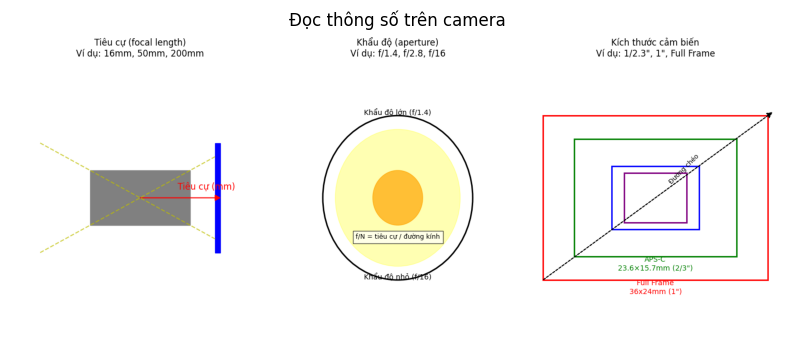

In [10]:
image_path = "image/doc_thong_so_camera.png"
show_image(image_path, "Đọc thông số trên camera")


## 3. Công thức tính FOV của camera <a id="cong-thuc-tinh-fov-cua-camera"></a>


### 3.1. Lý thuyết <a id="ly-thuyet"></a>
FOV (Field of View) là góc nhìn của camera, có thể tính toán dựa vào tiêu cự (focal length) và kích thước cảm biến của camera.


# FOV Calculation Formulas in LaTeX

### Công thức tính FOV

1. **FOV theo chiều ngang (FOV_x):**
   $$\text{FOV}_x = 2 \times \arctan\left(\frac{w}{2f}\right)$$
   
   Trong đó:
   - $w$ là chiều rộng cảm biến của camera
   - $f$ là tiêu cự của camera

2. **FOV theo chiều dọc (FOV_y):**
   $$\text{FOV}_y = 2 \times \arctan\left(\frac{h}{2f}\right)$$
   
   Trong đó:
   - $h$ là chiều cao cảm biến của camera
   - $f$ là tiêu cự của camera

3. **Tính khoảng cách làm việc (Working Distance - WD) từ FOV:**
   $$\text{WD} = \frac{\text{FOV}_{\text{width}} \times f}{\text{sensor\_width}}$$
   
   $$\text{WD} = \frac{\text{FOV}_{\text{height}} \times f}{\text{sensor\_height}}$$

### Ví dụ tính FOV
- Có một camera với cảm biến 1-inch có kích thước 13.1mm × 8.2mm, và sử dụng ống kính 16mm. Áp dụng công thức:
- FOV_x = 2 × arctan(13.1/(2×16)) = 2 × arctan(0.409) = 2 × 22.3° = 44.6°
- FOV_y = 2 × arctan(8.2/(2×16)) = 2 × arctan(0.256) = 2 × 14.4° = 28.8°
- Vậy với thiết lập này, camera sẽ có góc nhìn 44.6° theo chiều ngang và 28.8° theo chiều dọc."



### 3.2. Ví dụ trực quan <a id="vi-du-truc-quan"></a>

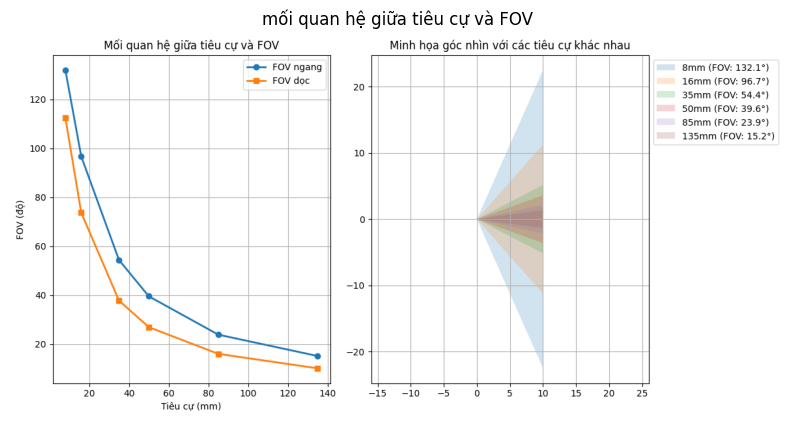

In [11]:
image_path = "image/mqh_tieucu_fov.png"

show_image(image_path, "mối quan hệ giữa tiêu cự và FOV")

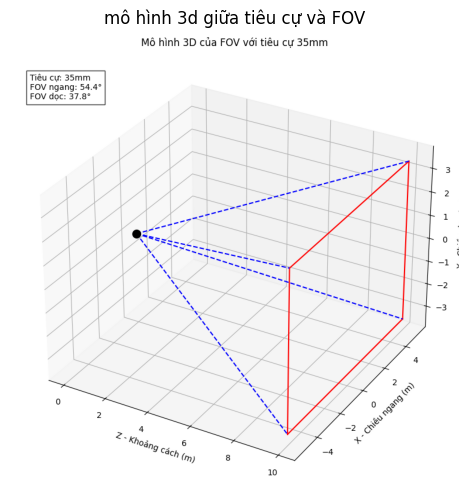

In [12]:
image_path = "image/3d_fov_tieucu.png"

show_image(image_path, "mô hình 3d giữa tiêu cự và FOV")

Tính FOV và khoảng cách làm việc (WD) cho đối tượng kích thước 100mm x 80mm:

Tiêu cự (mm) | FOV ngang (độ) | FOV dọc (độ) | WD cho width (mm) | WD cho height (mm)
------------------------------------------------------------------------------------------
         8.0 |           78.6 |         54.3 |              61.1 |               78.0
        12.0 |           57.3 |         37.7 |              91.6 |              117.1
        16.0 |           44.5 |         28.7 |             122.1 |              156.1
        25.0 |           29.4 |         18.6 |             190.8 |              243.9
        35.0 |           21.2 |         13.4 |             267.2 |              341.5
        50.0 |           14.9 |          9.4 |             381.7 |              487.8


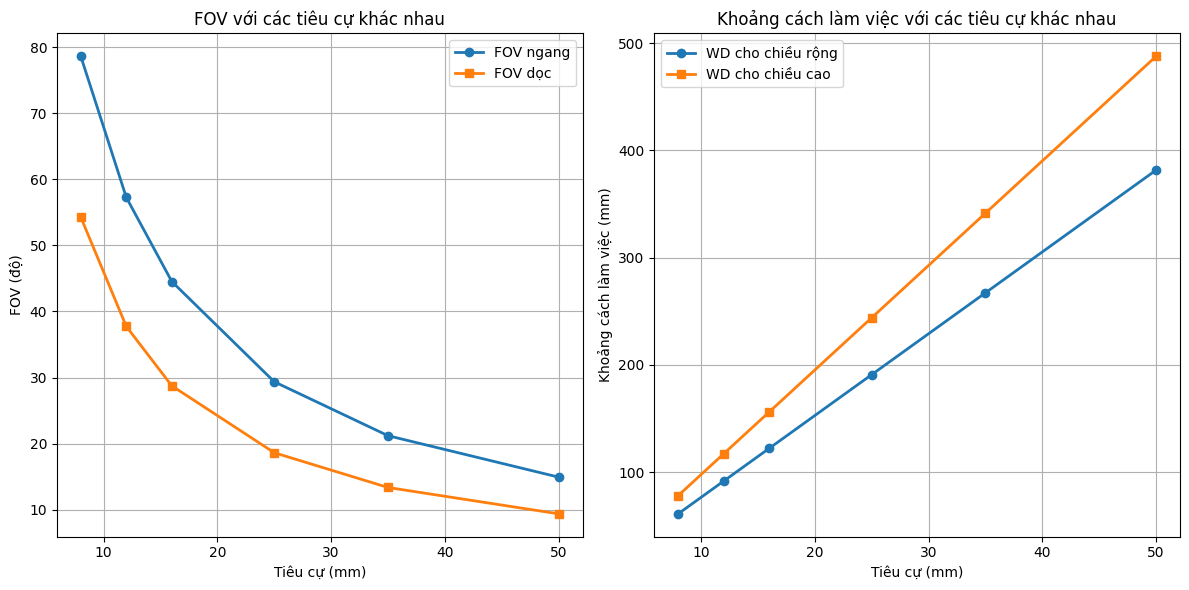

In [13]:
def calculate_fov(sensor_size, focal_length):
    # Tính FOV theo độ
    fov_rad = 2 * np.arctan(sensor_size / (2 * focal_length))
    fov_deg = np.degrees(fov_rad)
    return fov_deg

# Ứng dụng thực tế: Tính FOV và khoảng cách làm việc
def calculate_working_distance():
    # Thông số ống kính và cảm biến
    focal_lengths = [8, 12, 16, 25, 35, 50]  # mm
    sensor_width = 13.1  # mm (1" CMOS sensor)
    sensor_height = 8.2  # mm
    
    # Kích thước đối tượng cần kiểm tra
    object_width = 100  # mm
    object_height = 80  # mm
    
    print("Tính FOV và khoảng cách làm việc (WD) cho đối tượng kích thước {}mm x {}mm:".format(object_width, object_height))
    print("\nTiêu cự (mm) | FOV ngang (độ) | FOV dọc (độ) | WD cho width (mm) | WD cho height (mm)")
    print("-" * 90)
    
    for f in focal_lengths:
        # Tính FOV
        fov_x = calculate_fov(sensor_width, f)
        fov_y = calculate_fov(sensor_height, f)
        
        # Tính khoảng cách làm việc
        wd_width = (object_width * f) / sensor_width
        wd_height = (object_height * f) / sensor_height
        
        print(f"{f:12.1f} | {fov_x:14.1f} | {fov_y:12.1f} | {wd_width:17.1f} | {wd_height:18.1f}")
    
    # Vẽ biểu đồ minh họa
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(focal_lengths, [calculate_fov(sensor_width, f) for f in focal_lengths], 'o-', linewidth=2, label='FOV ngang')
    plt.plot(focal_lengths, [calculate_fov(sensor_height, f) for f in focal_lengths], 's-', linewidth=2, label='FOV dọc')
    plt.xlabel('Tiêu cự (mm)')
    plt.ylabel('FOV (độ)')
    plt.title('FOV với các tiêu cự khác nhau')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(focal_lengths, [(object_width * f) / sensor_width for f in focal_lengths], 'o-', linewidth=2, label='WD cho chiều rộng')
    plt.plot(focal_lengths, [(object_height * f) / sensor_height for f in focal_lengths], 's-', linewidth=2, label='WD cho chiều cao')
    plt.xlabel('Tiêu cự (mm)')
    plt.ylabel('Khoảng cách làm việc (mm)')
    plt.title('Khoảng cách làm việc với các tiêu cự khác nhau')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
# Tính FOV và khoảng cách làm việc
calculate_working_distance()


## 4. Undistort ảnh với OpenCV sử dụng mẫu bàn cờ <a id="undistort-anh-voi-opencv-su-dung-mau-ban-co"></a>

### 4.1. Thu thập ảnh calibration <a id="thu-thap-anh-calibration"></a>
Để undistort ảnh, trước tiên cần thu thập các ảnh bàn cờ (chessboard) từ nhiều góc độ khác nhau.

### 4.2. Undistort ảnh <a id="undistort-anh"></a>

### So sánh biến dạng ống kính:

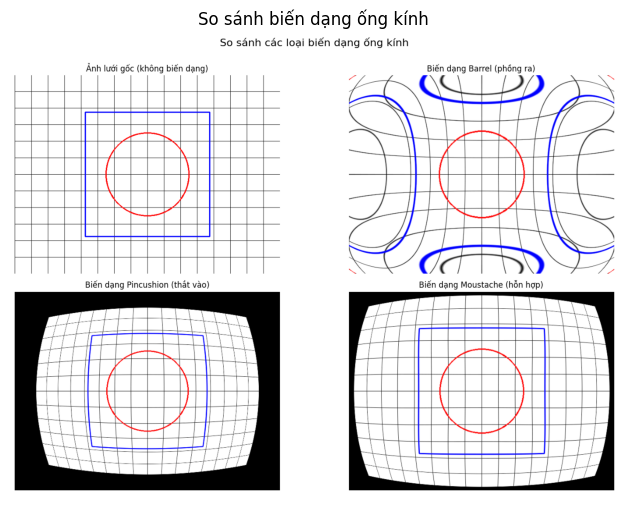

In [14]:
image_path = "image/so_sanh_bien_dang_ong-kinh.png"
show_image(image_path, "So sánh biến dạng ống kính")

Trong ứng dụng công nghiệp, đặc biệt là đo lường, các biến dạng này có thể dẫn đến sai số đáng kể. Ví dụ, một đường thẳng 100mm có thể đo được 102mm do biến dạng barrel.


### 4.3. THÔNG TIN VỀ CÁC HỆ SỐ BIẾN DẠNG <a id="thong-tin-ve-he-so-bien-dang"></a>
#### BIẾN DẠNG HƯỚNG TÂM
- Biến dạng hướng tâm (hay biến dạng pháp tuyến) là sự thay đổi kích thước của vật thể theo hướng vuông góc với bề mặt. Nó đặc trưng cho sự kéo dài hoặc co ngắn của một phần tử theo hướng vuông góc với bề mặt của nó.
##### Định nghĩa
Biến dạng hướng tâm xảy ra khi ánh sáng bị khúc xạ nhiều hơn ở các phần xa tâm quang học của ống kính
Điểm càng xa tâm ảnh thì biến dạng càng lớn
##### Biểu hiện: 
- Các đường thẳng bị cong, đặc biệt là ở vùng ngoại vi của ảnh
#### 1. CÁC HỆ SỐ BIẾN DẠNG (DISTORTION COEFFICIENTS):

Trong OpenCV, ma trận biến dạng $D$ thường gồm 5 thông số: $(k_1, k_2, p_1, p_2, k_3)$
- $k_1, k_2, k_3$: Các hệ số biến dạng hướng tâm (radial distortion)
- $p_1, p_2$: Các hệ số biến dạng tiếp tuyến (tangential distortion)

Công thức toán học của biến dạng hướng tâm:
$$x_{distorted} = x(1 + k_1r^2 + k_2r^4 + k_3r^6)$$
$$y_{distorted} = y(1 + k_1r^2 + k_2r^4 + k_3r^6)$$

Trong đó $r$ là khoảng cách từ điểm đến tâm ảnh: $r^2 = x^2 + y^2$

####  BIẾN DẠNG TIẾP TUYẾN (TANGENTIAL DISTORTION)
##### Định nghĩa
Biến dạng tiếp tuyến xảy ra khi mặt phẳng cảm biến không hoàn toàn song song với ống kính
##### Nguyên nhân: 
Lỗi lắp ráp cơ khí giữa ống kính và cảm biến
##### Biểu hiện: 
Hình ảnh bị méo và các điểm không nằm đúng vị trí dự kiến
##### Công thức toán học của biến dạng tiếp tuyến:
$$x_{distorted} = x + [2p_1xy + p_2(r^2 + 2x^2)]$$
$$y_{distorted} = y + [p_1(r^2 + 2y^2) + 2p_2xy]$$

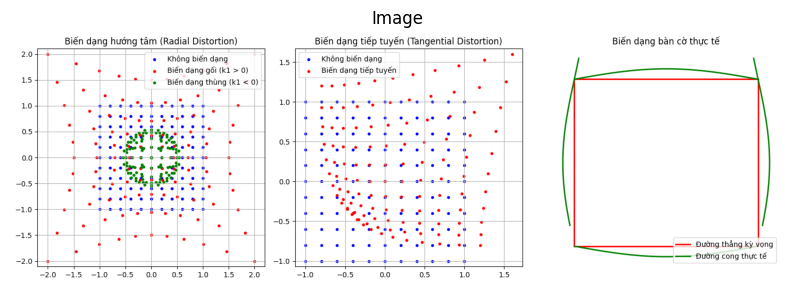

In [15]:
image_path = "image/bien_dang_ban_co_goi_thung.png"
show_image(image_path)

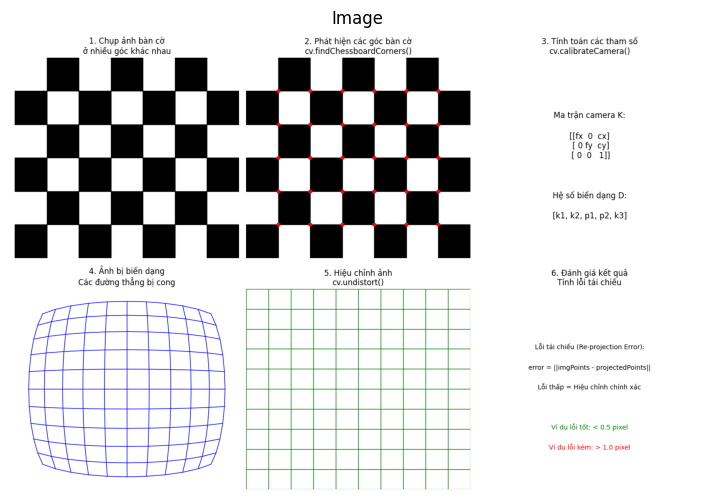

In [16]:
image_path = "image/step__to_undistort.png"
show_image(image_path)



### CÁC YẾU TỐ ẢNH HƯỞNG ĐẾN BIẾN DẠNG

#### 1. Loại ống kính:
- Ống kính góc rộng: biến dạng thùng lớn
- Ống kính fisheye: biến dạng thùng cực đại
- Ống kính tele: biến dạng gối
#### 2. Chất lượng ống kính
- Ống kính cao cấp: ít biến dạng hơn
- Ống kính giá rẻ: biến dạng nhiều hơn
#### 3. Độ chính xác lắp ráp
- Lắp ráp chính xác: ít biến dạng tiếp tuyến
- Lắp ráp không chính xác: biến dạng tiếp tuyến đáng kể




### ỨNG DỤNG THỰC TẾ

#### 1. Thị giác máy tính
- Đo lường chính xác kích thước đối tượng
- Phát hiện và theo dõi đối tượng
- Ghép ảnh panorama

#### 2. Thực tế tăng cường (AR)
- Định vị chính xác các đối tượng ảo trong không gian thực
  Theo dõi chuyển động trong không gian 3D

#### 3. Xe tự lái
- Phát hiện làn đường, biển báo chính xác
- Đo khoảng cách đến các đối tượng
- Kết hợp dữ liệu từ nhiều camera



### DEMO